# Facteurs de variabilités

- **Type de données** :
  
  - Les types de données utilisés peuvent affecter le résultat des calculs, en particulier les différences entre `int` et les différents types de `float`.
  
  - Types de flottants les plus communs :
    - `float32` : Simple précision (32 bits), offre une précision moindre, mais est plus rapide et utilise moins de mémoire.
    - `float64` : Double précision (64 bits), généralement utilisé pour un bon compromis entre précision et performance.
    - `float128` : Quadruple précision (128 bits), offre une précision élevée, mais est plus lent et consomme davantage de mémoire.

<br>

- **Précision de la représentation** :
  
  - La précision de la représentation détermine combien de chiffres significatifs un type de données flottant peut représenter. Les erreurs d'arrondi sont inévitables, car certains nombres ne peuvent pas être représentés exactement en virgule flottante.
  
  - Les nombres avec une précision plus élevée (comme `float64` et `float128`) sont généralement plus précis, mais les erreurs d'arrondi persistent, surtout lors d'opérations répétées ou complexes.

<br>

- **Erreur d'arrondi** :

   - Chaque opération arithmétique (addition, soustraction, multiplication, division) peut introduire une petite erreur due à la précision limitée.
     
   - Ces erreurs d'arrondi s'accumulent au fur et à mesure des calculs, affectant le résultat final.
  
<br>

- **Accumulation d’erreurs** :
  
  - Les erreurs d'arrondi s'accumulent de manière différente selon l'ordre des opérations, ce qui peut influencer le résultat final dans les calculs impliquant de multiples opérations.
  
  - Cette accumulation peut mener à des déviations significatives dans le résultat, surtout dans des calculs de grande envergure ou des opérations répétitives.

<br>

- **Débordement et sous-dépassement (overflow et underflow)** :
  
  - Certains calculs peuvent générer des valeurs qui dépassent la plage des valeurs représentables par le type de donnée, entraînant un débordement (`overflow`) ou un sous-dépassement (`underflow`).
  
  - Le débordement peut mener à des valeurs infinies, tandis que le sous-dépassement produit des valeurs proches de zéro, modifiant le comportement global des calculs.


In [5]:
!pip install seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


Règles de l'arbre de décision :

|--- tolerance <= 0.00
|   |--- nombreEssais <= 75000.00
|   |   |--- nombreEssais <= 30000.00
|   |   |   |--- value: [77.51]
|   |   |--- nombreEssais >  30000.00
|   |   |   |--- value: [77.50]
|   |--- nombreEssais >  75000.00
|   |   |--- value: [77.27]
|--- tolerance >  0.00
|   |--- value: [100.00]



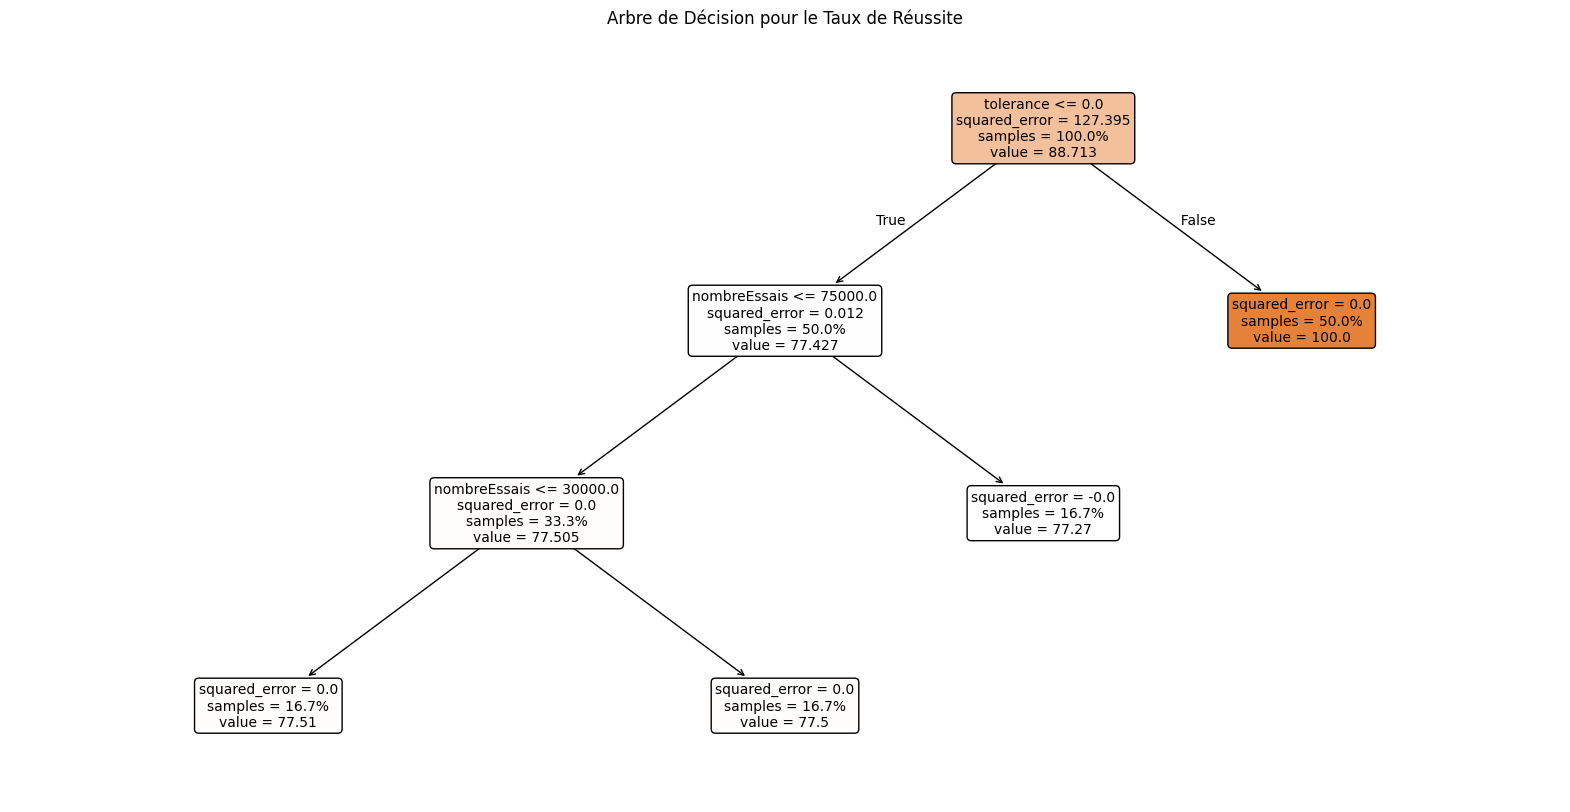

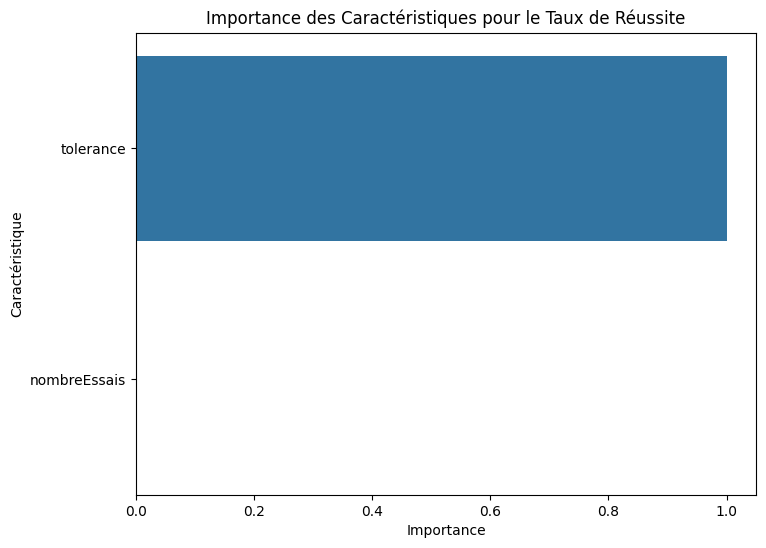

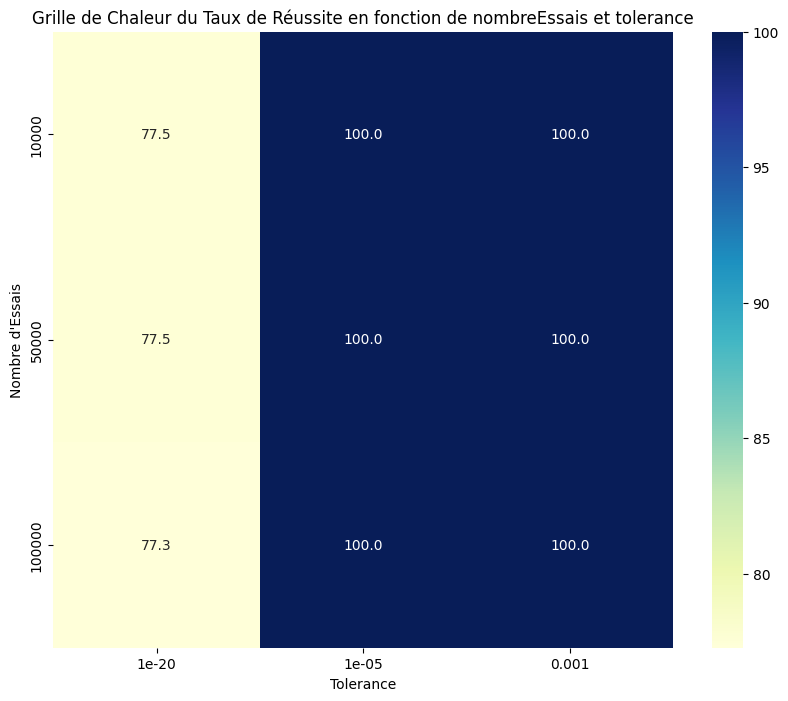

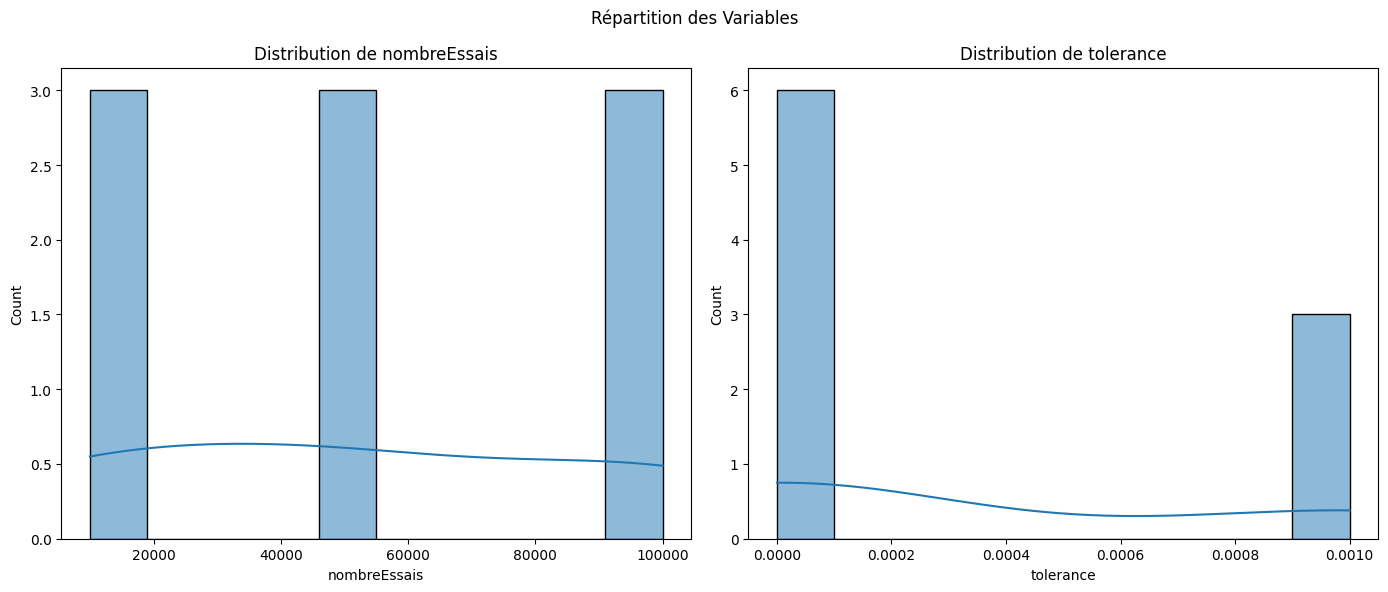

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split

# Chargement des données
data = pd.read_csv("results.csv")

# Définition des caractéristiques et de la cible
X = data[['nombreEssais', 'tolerance']]
y = data['tauxReussite']

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement de l'arbre de décision
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Affichage des règles
tree_rules = export_text(tree, feature_names=['nombreEssais', 'tolerance'])
print("Règles de l'arbre de décision :\n")
print(tree_rules)

# Visualisation de l'arbre de décision avec ajustement de la taille de la figure et des nœuds
plt.figure(figsize=(20, 10))
plot_tree(
    tree, 
    feature_names=['nombreEssais', 'tolerance'], 
    filled=True, 
    rounded=True, 
    fontsize=10,
    proportion=True
)
plt.title("Arbre de Décision pour le Taux de Réussite")
plt.show()

# Importance des caractéristiques
importances = tree.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Caractéristique': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage des importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Caractéristique', data=importance_df)
plt.title("Importance des Caractéristiques pour le Taux de Réussite")
plt.show()

# Grille de chaleur pour observer les relations entre les variables
heatmap_data = data.pivot_table(values='tauxReussite', index='nombreEssais', columns='tolerance')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Grille de Chaleur du Taux de Réussite en fonction de nombreEssais et tolerance")
plt.xlabel("Tolerance")
plt.ylabel("Nombre d'Essais")
plt.show()

# Visualisation de la répartition des variables
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Répartition de nombreEssais
sns.histplot(data['nombreEssais'], bins=10, kde=True, ax=ax[0])
ax[0].set_title("Distribution de nombreEssais")

# Répartition de tolerance
sns.histplot(data['tolerance'], bins=10, kde=True, ax=ax[1])
ax[1].set_title("Distribution de tolerance")

plt.suptitle("Répartition des Variables")
plt.tight_layout()
plt.show()

# Conclusion

Suite aux tests menés, nous observons que seule la variation de **précision de la représentation**, liée aux **erreurs d'arrondi**, entraîne des résultats différents. Les autres facteurs, bien qu'ils puissent théoriquement influencer les calculs en virgule flottante, n'ont pas montré d'impact significatif dans nos observations actuelles. Cela souligne l'importance de la précision choisie pour les calculs en fonction des exigences de chaque application.
